# Analysis

In [8]:
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade seaborn
# !pip install --upgrade scikit-learn

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
import plotly.express as px
import plotly
print(f"Version of numpy: {np.__version__}")
print(f"Version of pandas: {pd.__version__}")
print(f"Version of sklearn: {sklearn.__version__}")
print(f"Version of seaborn: {sns.__version__}")
print(f"Version of sklearn: {sklearn.__version__}")
print(f"Version of pycountry_convert: {pc.__version__}")
print(f"Version of plotly: {plotly.__version__}")

Version of numpy: 1.26.4
Version of pandas: 2.2.2
Version of sklearn: 1.5.0
Version of seaborn: 0.13.2
Version of sklearn: 1.5.0
Version of pycountry_convert: 0.7.2
Version of plotly: 5.24.1


In [4]:
# Import dataset
df = pd.read_excel("./data/DataForTable2.1WHR2023.xls")

## Step 0: Clean the dataset

In [5]:
# Rename columns
df = df.rename(columns={'Country name': "country",
                        'year': "year",
                        'Life Ladder': "ladder",
                        'Log GDP per capita': "log_gdp",
                        'Social support': "social_support",
                        'Healthy life expectancy at birth': "life_expectancy",
                        'Freedom to make life choices': "freedom",
                        'Generosity': "generosity",
                        'Perceptions of corruption': "corruption",
                        'Positive affect': "pos",
                        'Negative affect': "neg"})
# Row selection
df = df[df.year == 2022].reset_index(drop=True)
# Column selection
df = df.drop(["year", "pos", "neg"], axis=1)

In [6]:
# Check dimension
m, n = df.shape
print(f"The dataset has {m} rows and {n} columns")

The dataset has 114 rows and 8 columns


In [7]:
# Check the unique value for categorical variables i.e. country
print(f'Is the feature country unique?: {df["country"].nunique() == m}')

Is the feature country unique?: True


In [8]:
# Checking missing value for continuous variables
df.describe()

,ladder,log_gdp,social_support,life_expectancy,freedom,generosity,corruption
count,114.000000,108.000000,114.000000,111.000000,113.000000,108.000000,111.000000
mean,5.585126,9.523087,0.798006,65.286712,0.790447,0.028539,0.720852
std,1.265302,1.192070,0.148274,5.708647,0.117721,0.164155,0.176168
min,1.281271,7.006671,0.228217,51.750000,0.368377,-0.316425,0.190207
25%,4.715273,8.637480,0.725221,60.849998,0.723089,-0.084669,0.656535
50%,5.891891,9.627914,0.859008,66.199997,0.800192,0.012942,0.762208
75%,6.478360,10.591078,0.901272,70.212502,0.877969,0.139438,0.847604
max,7.728998,11.659949,0.984801,74.474998,0.975405,0.518823,0.941626


* Generosity can be negative because it is the residual of regressing national average of response to the question "Have you donated money to a charity in the past month?" on GDP per capita

In [9]:
# Remove the rows if any missing
df = df.dropna(axis=0, how="any", inplace=False, ignore_index=True)
m, n = df.shape
print(f"The dataset has {m} rows and {n} columns")

The dataset has 104 rows and 8 columns


In [10]:
df.head()

,country,ladder,log_gdp,social_support,life_expectancy,freedom,generosity,corruption
0,Albania,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502
1,Argentina,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037
2,Armenia,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730
3,Australia,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217
4,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212


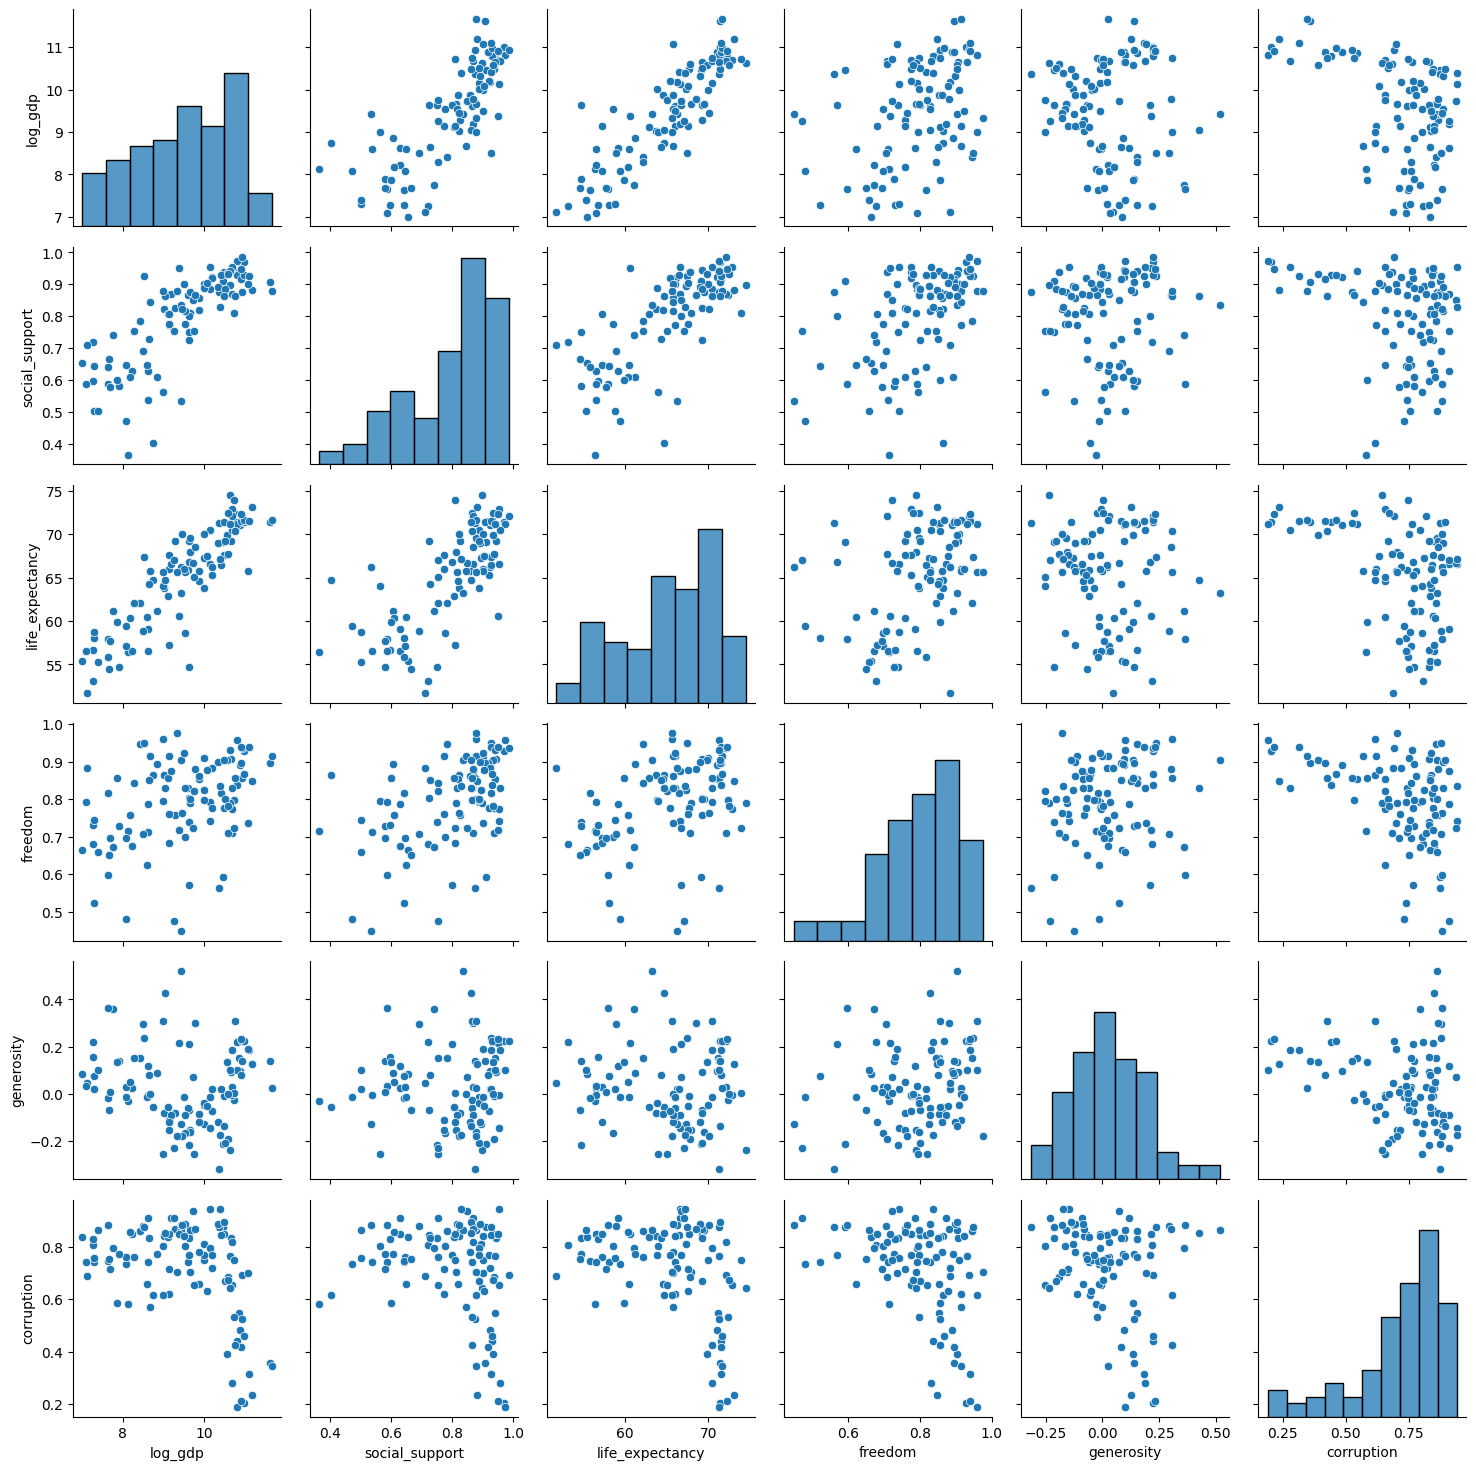

In [11]:
# Check collinearity 
g = sns.PairGrid(df.drop(["country", "ladder"], axis=1))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

* It is obvious that GDP per capita is positively correlated to Healthy Life Expectancy and Social Support
* However, it seeems that Generosity and Corruption does not have an obvious linear relationship with other measurements.

In [12]:
# Summary of dataset after cleansing
df.head()

,country,ladder,log_gdp,social_support,life_expectancy,freedom,generosity,corruption
0,Albania,5.212213,9.626483,0.724090,69.175003,0.802250,-0.065987,0.845502
1,Argentina,6.260993,10.011405,0.893330,67.250000,0.825189,-0.127506,0.810037
2,Armenia,5.381943,9.667766,0.811169,67.925003,0.789599,-0.154325,0.704730
3,Australia,7.034696,10.853529,0.941673,71.125000,0.853777,0.153465,0.545217
4,Austria,6.998997,10.938917,0.876287,71.275002,0.855503,0.139042,0.524212


## Step 1: Standardization (using sample standard deviation)

In [13]:
data = df.drop(["country", "ladder"], axis=1).to_numpy()
print(f"The data has shape of {data.shape}")
mean = np.mean(a=data, axis=0)
print(f"Mean: {mean}")
std = np.std(a=data, axis=0, ddof=1)
print(f"Standard deviation: {std}")
scaled_data = (data - mean) / std
print(f"The scaled data has shape of {scaled_data.shape}")

The data has shape of (104, 6)
Mean: [9.49703255e+00 7.98041067e-01 6.52752404e+01 7.94433150e-01
 2.82236492e-02 7.16338353e-01]
Standard deviation: [1.19690009 0.14281086 5.72014684 0.11333384 0.16401471 0.18017602]
The scaled data has shape of (104, 6)


### Remark
* If `sklearn.preprocessing.StandardScaler` from scikit learn is used, the degree of freedom will be 0

## Method 1: numpy

### Step 2: Sample Covariance / Correlation Matrix 

In [14]:
cov = np.cov(scaled_data, rowvar=False, ddof=1)
print(f"Covariance or Correlation matrix: \n {cov}")

Covariance or Correlation matrix: 
 [[ 1.          0.78742257  0.87971382  0.38057512 -0.08494672 -0.4487724 ]
 [ 0.78742257  1.          0.74068994  0.48632145  0.0546591  -0.27336239]
 [ 0.87971382  0.74068994  1.          0.39596967 -0.07023385 -0.39656696]
 [ 0.38057512  0.48632145  0.39596967  1.          0.2093565  -0.40078613]
 [-0.08494672  0.0546591  -0.07023385  0.2093565   1.         -0.26468722]
 [-0.4487724  -0.27336239 -0.39656696 -0.40078613 -0.26468722  1.        ]]


### Step 3: Eigendecomposition

In [15]:
values, vectors = np.linalg.eig(cov)
print(f"Eigenvalues: {values}")
print(f"Eigenvector shown by column: \n {vectors}")

Eigenvalues: [3.15479086 1.26426015 0.10282939 0.21497689 0.60110484 0.66203788]
Eigenvector shown by column: 
 [[-0.51472891 -0.22842846  0.78917766  0.08502942 -0.19838286 -0.11613546]
 [-0.48638021 -0.13073287 -0.27487516 -0.69717396 -0.20190405  0.37943389]
 [-0.50355543 -0.22740904 -0.51730811  0.62281349 -0.19011509 -0.05539842]
 [-0.36056268  0.32729304  0.08992163  0.1667308   0.74335541  0.41762602]
 [-0.05181583  0.77695269  0.07243624  0.15605807 -0.55016707  0.24773919]
 [ 0.33500752 -0.41016859  0.14388077  0.25820252 -0.16874295  0.77697316]]


* In the matrix of **Eigenvectors**, each column represent a principal component

### Step 4a: Sort Components

In [16]:
ordered_column_index = np.argsort(values)[::-1]
ordered_values = values[ordered_column_index]
ordered_vectors = vectors[:,ordered_column_index]
ordered_vectors

array([[-0.51472891, -0.22842846, -0.11613546, -0.19838286,  0.08502942,
         0.78917766],
       [-0.48638021, -0.13073287,  0.37943389, -0.20190405, -0.69717396,
        -0.27487516],
       [-0.50355543, -0.22740904, -0.05539842, -0.19011509,  0.62281349,
        -0.51730811],
       [-0.36056268,  0.32729304,  0.41762602,  0.74335541,  0.1667308 ,
         0.08992163],
       [-0.05181583,  0.77695269,  0.24773919, -0.55016707,  0.15605807,
         0.07243624],
       [ 0.33500752, -0.41016859,  0.77697316, -0.16874295,  0.25820252,
         0.14388077]])

### Step 4b: Select components

In [17]:
explained_variance_ratio = ordered_values / ordered_values.sum()
print(f"Variance explained by components: {explained_variance_ratio}")
cumulative_result = np.cumsum(explained_variance_ratio)
print(f"Cumulative variance explained: {cumulative_result}")

Variance explained by components: [0.52579848 0.21071002 0.11033965 0.10018414 0.03582948 0.01713823]
Cumulative variance explained: [0.52579848 0.7365085  0.84684815 0.94703229 0.98286177 1.        ]


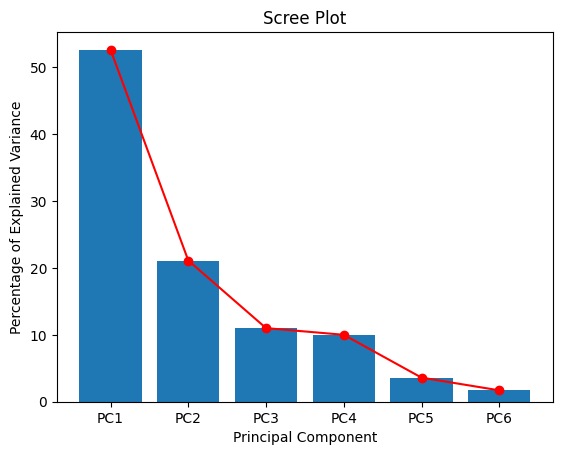

In [18]:
per_var = np.round(explained_variance_ratio * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.plot(range(1,len(per_var)+1), per_var, marker="o", color="red")
plt.title('Scree Plot')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

* If setting the threshold to be 80%, select first 3 PCs
* For easier visualiation, only 2 PCs are selected

In [19]:
n_pc = 2
selected_values = ordered_values[0:n_pc]
selected_vectors = ordered_vectors[:,0:n_pc]
index = df.drop(["country", "ladder"], axis=1).columns
df_pc = pd.DataFrame(selected_vectors, columns=["PC1", "PC2"], index=index)
print(df_pc)

                      PC1       PC2
log_gdp         -0.514729 -0.228428
social_support  -0.486380 -0.130733
life_expectancy -0.503555 -0.227409
freedom         -0.360563  0.327293
generosity      -0.051816  0.776953
corruption       0.335008 -0.410169


### Step 5: Projection

In [20]:
projected_data = np.matmul(scaled_data, selected_vectors)
df_projected_data = pd.DataFrame(projected_data, columns=["PC1", "PC2"], index=df.country).reset_index(drop=False)

In [21]:
# Get the happiness score i.e. ladder 
df_projected_data = df_projected_data.merge(right=df[["country", "ladder"]], how="left", on=["country"])

In [22]:
# Make an interactive scatter plot by happiness score
fig = px.scatter(df_projected_data, x="PC1", y="PC2", color="ladder",
                 color_continuous_scale=px.colors.sequential.Turbo,
                 title="Plot of First and Second Principal Component by Happiness Score",
                 labels={"country": "Country", "PC1": "Principal Component 1", "PC2": "Principal Component 2",
                         "ladder": "Happiness Category"},
                 hover_data=["country", "ladder"])
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20, family="Arial")),
    xaxis=dict(title=dict(text="Principal Component 1", font=dict(size=18, family="Arial"))),
    yaxis=dict(title=dict(text="Principal Component 2", font=dict(size=18, family="Arial"))),
    legend=dict(title=dict(text="Happiness Category", font=dict(size=14, family="Arial"))),
    coloraxis_colorbar=dict(title=dict(text="Happiness Score", font=dict(size=14, family="Arial")))
)
fig.show()


* Since the explained variance of the first PC is high, the red and blue points are separated along PC1
* However, the explained variance of the second PC is low, it would not be so helpful to separate the points

In [25]:
# Create a variable "continent" for interpretation
def country_to_continent(country_name):
    try: 
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except KeyError: 
        return "Not found"
    except Exception:
        return "Others"

In [26]:
df_projected_data["continent"] = df_projected_data.country.apply(country_to_continent)

In [28]:
# Manually fix the missing value of continent
print(df_projected_data.groupby(["continent"]).size())
df_projected_data[df_projected_data.continent.isin(["Not found", "Others"])]

continent
Africa           28
Asia             19
Europe           33
North America    11
Not found         2
Oceania           2
South America     9
dtype: int64


,country,PC1,PC2,ladder,continent
19,Congo (Brazzaville),2.229023,0.350839,5.804919,Not found
20,Congo (Kinshasa),3.051026,0.626372,3.207197,Not found


In [29]:
df_projected_data.at[19, "continent"] = "Africa"
df_projected_data.at[20, "continent"] = "Africa"

In [31]:
# Make an interactive scatter plot by continent
fig = px.scatter(df_projected_data, x="PC1", y="PC2", color="continent",
                 color_discrete_sequence=px.colors.qualitative.T10,
                 title="Plot of First and Second Principal Component by Continent",
                 labels={"country": "Country", 
                         "PC1": "Principal Component 1", "PC2": "Principal Component 2",
                         "continent": "Continent",
                         "ladder": "Happiness Category"},
                 hover_data=["country", "continent", "ladder"])
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20, family="Arial")),
    xaxis=dict(title=dict(text="Principal Component 1", font=dict(size=18, family="Arial"))),
    yaxis=dict(title=dict(text="Principal Component 2", font=dict(size=18, family="Arial"))),
    legend=dict(title=dict(text="Continent", font=dict(size=14, family="Arial"))),
)
fig.show()

1. Note that not all countries for each continent were included in the dataset. Hence, the following discussion on continents cannot represent all countries in continents. For example, Fiji is also in Oceania, but was not included in the dataset downloaded from WHO. 
2. The loadings from Step 4b show that `log_gdp` (-0.514729), `social_support` (-0.486380), `life_expectancy` (-0.503555), and `freedom` (-0.360563) have strong to moderate negative contributions to PC1, indicating that higher values in these well-being indicators correspond to lower PC1 scores. Conversely, `corruption` (0.335008) exhibits a moderate positive loading, suggesting that greater perceived corruption increases PC1 scores, while `generosity` (-0.051816) has a negligible negative loading, contributing little to this component. PC1 likely represents a 'well-being versus corruption' axis, where countries with high socioeconomic well-being (e.g., wealth, health, social support, and autonomy) and low corruption perception are characterized by strongly negative PC1 scores, and those with lower well-being and higher corruption perception have positive PC1 scores. Mapping countries to their continents reveals a clear pattern: most European countries (e.g., Denmark: -3.21, Finland: -3.21) exhibit negative PC1 scores, reflecting high well-being and low corruption, whereas most African countries (e.g., Sierra Leone: 3.46, Comoros: 3.28) show positive PC1 scores, indicating lower well-being and higher perceived corruption
3. On PC2, the loadings indicate that `generosity` (0.776953) and `freedom` (0.327293) contribute positively, while `corruption` (-0.410169), `log_gdp` (-0.228428), `life_expectancy` (-0.227409), and `social_support` (-0.130733) have negative loadings, with the latter three being moderate to weak. PC2 might represent a 'generosity-driven resilience and freedom' axis, where countries with high generosity (adjusted for GDP), satisfaction with freedom, and lower perceived corruption have positive PC2 scores, while those with lower generosity, less freedom, and higher corruption perception have negative PC2 scores. After mapping countries to their continents, we observe that several Asian countries (e.g., Indonesia, Uzbekistan) and Northern European countries (e.g., Sweden, Denmark) tend to have positive PC2 scores, reflecting strong generosity and freedom, whereas Southern and Eastern European countries (e.g., Greece, Croatia) and some African countries (e.g., Tunisia) often have negative PC2 scores, potentially indicating lower generosity and higher corruption perception

## Method 2: scikit-learn

In [33]:
# Step 2-3: Eigendecomposition (using sample covariance matrix)
pca = PCA()
pca.fit(scaled_data)
print(f"Eigenvalues: {pca.explained_variance_}") 
print(f"Eigenvectors: {pca.components_}") 

Eigenvalues: [3.15479086 1.26426015 0.66203788 0.60110484 0.21497689 0.10282939]
Eigenvectors: [[ 0.51472891  0.48638021  0.50355543  0.36056268  0.05181583 -0.33500752]
 [-0.22842846 -0.13073287 -0.22740904  0.32729304  0.77695269 -0.41016859]
 [-0.11613546  0.37943389 -0.05539842  0.41762602  0.24773919  0.77697316]
 [-0.19838286 -0.20190405 -0.19011509  0.74335541 -0.55016707 -0.16874295]
 [-0.08502942  0.69717396 -0.62281349 -0.1667308  -0.15605807 -0.25820252]
 [ 0.78917766 -0.27487516 -0.51730811  0.08992163  0.07243624  0.14388077]]


In [34]:
# Step 4: Sort and Select Components
pca = PCA(2)
pca.fit(scaled_data)
print(f"Eigenvalues: {pca.explained_variance_}") 
print(f"Eigenvectors: {pca.components_}") 

Eigenvalues: [3.15479086 1.26426015]
Eigenvectors: [[ 0.51472891  0.48638021  0.50355543  0.36056268  0.05181583 -0.33500752]
 [-0.22842846 -0.13073287 -0.22740904  0.32729304  0.77695269 -0.41016859]]


* The direction of the principal components is not unique; it can be multiplied by -1 and still represent the same subspace.

In [35]:
# Step 5: Projection
pca_data = pca.transform(scaled_data)

## Discussion

* PCA offers the advantage of being non-parametric, eliminating the need for parameter tuning. The resulting dataset is distinctive and user-independent. 
* However, the drawback is that users must comprehend the dataset prior to implementation, as PCA relies on several assumptions. For instance, in health care research, it is more common to combine height and weight into BMI rather than their linear combination.
* Moreover, interpreting the transformed data in relation to the original features and their contributions to each principal component necessitates domain knowledge